# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [4]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [5]:
df['dt'] = pd.to_datetime(df['dt'])

In [8]:
new_df = df[df['dt'] >= pd.to_datetime('1950-01-01')]
new_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

<Axes: xlabel='dt'>

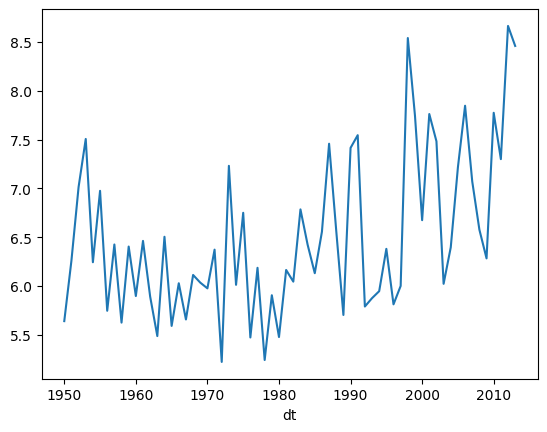

In [27]:
tmp_df = new_df[new_df['City'] == 'Toronto'].reset_index()
year_average_temp = tmp_df.groupby(tmp_df['dt'].dt.year)['AverageTemperature'].mean()
year_average_temp.plot()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [36]:
vars = new_df.groupby(new_df['City'])['AverageTemperature'].var()
vars.index[vars.argmax()]

'Harbin'

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

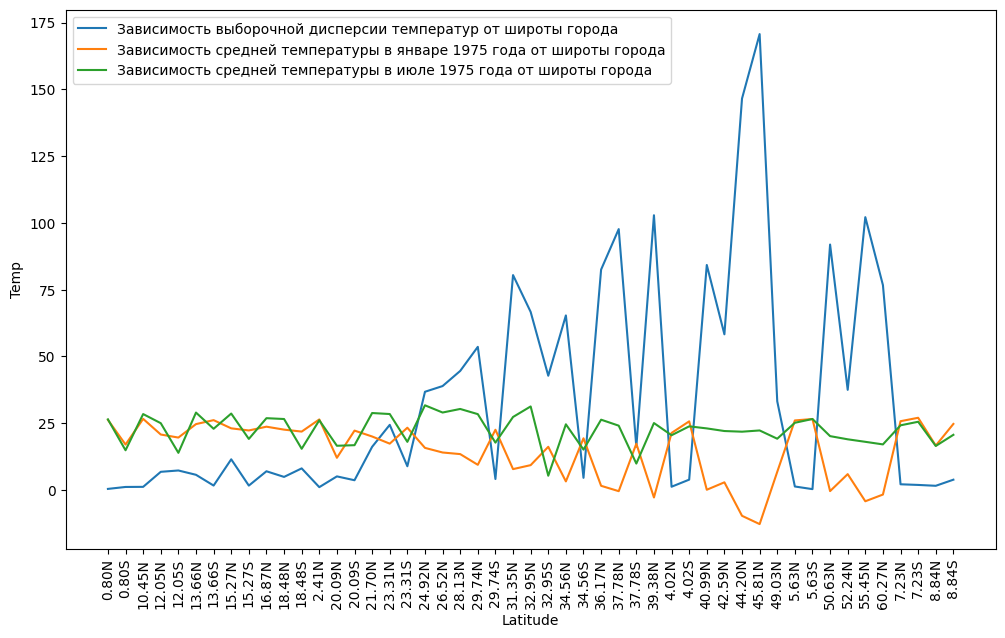

In [64]:
first_graph = new_df.groupby(new_df['Latitude'])['AverageTemperature'].var()
second_graph = new_df[(new_df['dt'].dt.year == 1975) & (new_df['dt'].dt.month == 1)].groupby(new_df['Latitude'])['AverageTemperature'].mean()
third_graph = new_df[(new_df['dt'].dt.year == 1975) & (new_df['dt'].dt.month == 7)].groupby(new_df['Latitude'])['AverageTemperature'].mean()
plt.figure(figsize= (12, 7))
plt.plot(first_graph)
plt.plot(second_graph)
plt.plot(third_graph)

plt.xticks(rotation=90)

plt.ylabel('Temp')
plt.xlabel('Latitude')

plt.legend(['Зависимость выборочной дисперсии температур от широты города',
            'Зависимость средней температуры в январе 1975 года от широты города',
            'Зависимость средней температуры в июле 1975 года от широты города'])


# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

Text(0.5, 0, 'Temp')

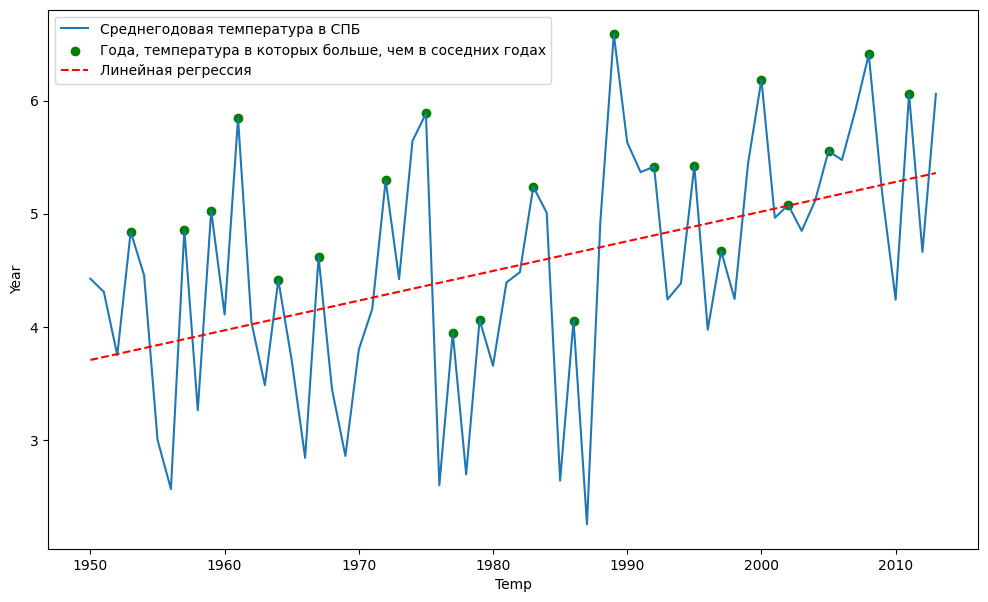

In [113]:
from sklearn.linear_model import LinearRegression
import numpy as np

spb_df = new_df[new_df['City'] == 'Saint Petersburg']

# среднегодовая температура
avg_mean_temp_spb = spb_df.groupby(spb_df['dt'].dt.year)['AverageTemperature'].mean()

# точки подходящие под условия
cond_years = [avg_mean_temp_spb.index[idx] for idx in range(1, len(avg_mean_temp_spb)-1) \
               if avg_mean_temp_spb.values[idx] > avg_mean_temp_spb.values[idx-1] \
                and avg_mean_temp_spb.values[idx] > avg_mean_temp_spb.values[idx+1]]

# построение линейной регрессии
train_x, train_y = np.array(avg_mean_temp_spb.index).reshape(-1,1), np.array(avg_mean_temp_spb.values).reshape(-1,1)
model = LinearRegression().fit(train_x, train_y)

plt.figure(figsize= (12, 7))

plt.plot(avg_mean_temp_spb)
plt.scatter(cond_years, avg_mean_temp_spb[cond_years],c='green')
plt.plot(train_x, model.predict(train_x), linestyle='dashed', c='red')

plt.legend(['Среднегодовая температура в СПБ', 'Года, температура в которых больше, чем в соседних годах', 'Линейная регрессия'])
plt.ylabel('Year')
plt.xlabel('Temp')

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [147]:
groupped = new_df.groupby([new_df['City'], new_df['dt'].dt.year])['AverageTemperature'].mean()

diff = groupped.groupby('City').max() - groupped.groupby('City').min() 

diff[diff == diff.max()]

City
Mashhad    5.25
Name: AverageTemperature, dtype: float64

In [258]:
new_df['y'] = new_df['dt'].dt.year
new_df['m'] = new_df['dt'].dt.month

groupped_month = new_df.groupby([new_df['City'], new_df['m'], new_df['y']])['AverageTemperature'].mean()

groupped_month
july_avg_temp = groupped_month[groupped_month.index.get_level_values('m') == 7].reset_index()[['City', 'y', 'AverageTemperature']].set_index(['City', 'y'])
jan_avg_temp = groupped_month[groupped_month.index.get_level_values('m') == 1].reset_index()[['City', 'y', 'AverageTemperature']].set_index(['City', 'y'])

diff = jan_avg_temp - july_avg_temp

groupped_city = diff.groupby('City')['AverageTemperature'].mean()
res = groupped_city.sort_values()

f'Если имеется ввиду абсолютное значение, то {res.index[0] } (с температурой {res[0]}), если нет, то {res.index[-1]} (с температурой {res[-1]})'

/var/folders/qn/wj4_7b6s15b8h1mjnbzrfwyryqk4j8/T/ipykernel_82883/4244893185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['y'] = new_df['dt'].dt.year
/var/folders/qn/wj4_7b6s15b8h1mjnbzrfwyryqk4j8/T/ipykernel_82883/4244893185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['m'] = new_df['dt'].dt.month


'Если имеется ввиду абсолютное значение, то Harbin (с температурой -41.99271875), если нет, то Santiago (с температурой 13.273109375)'

In [256]:
# считаем, что месяц с отрицательной температурой это месяц, в котором хотя бы один день была отрицательная температура.
minus = new_df.copy()
minus['is_minus_temp'] = minus['AverageTemperature'] < 0
minus_groupped = minus.groupby([minus['City'], minus['y'], minus['m']])['is_minus_temp'].any()

avg_month_count = minus_groupped.groupby(['City', 'y']).sum().groupby('City').mean()
avg_month_count.sort_values().index[-1]

'Harbin'

##### Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна: **Mashhad**

##### Самая большая средняя разница между средней температурой января и средней температурой июля: смотря что имеется ввиду. Если имеется ввиду абсолютное значение, то **Harbin**, если нет, то Santiago

#### Наибольшее среднее количество месяцев с отрицательной температурой в году: **Harbin**

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 